   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtyp

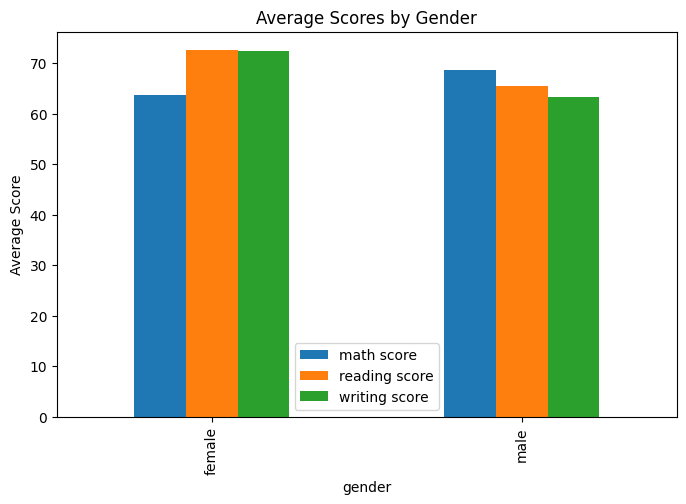

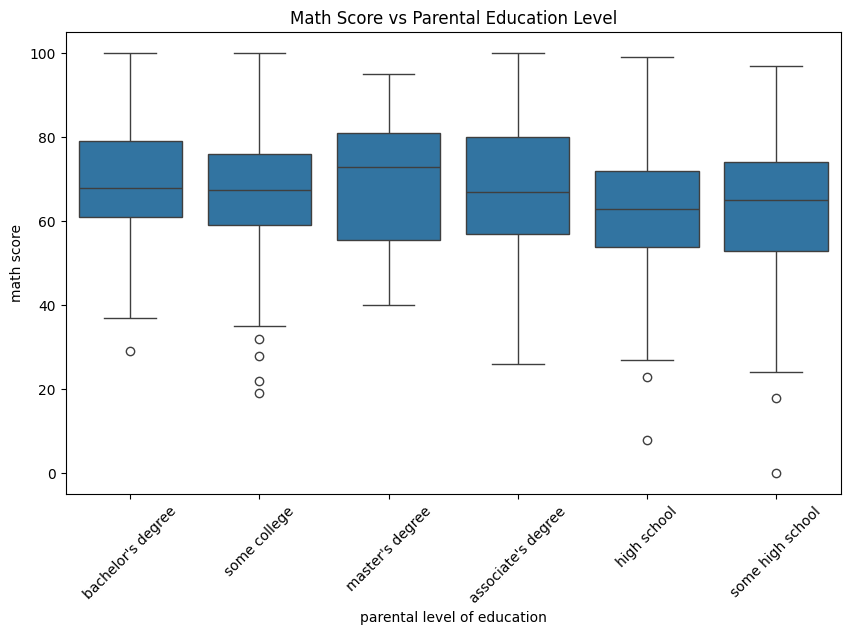

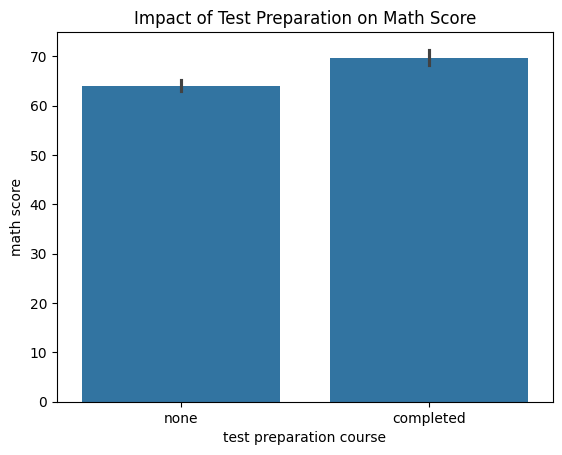

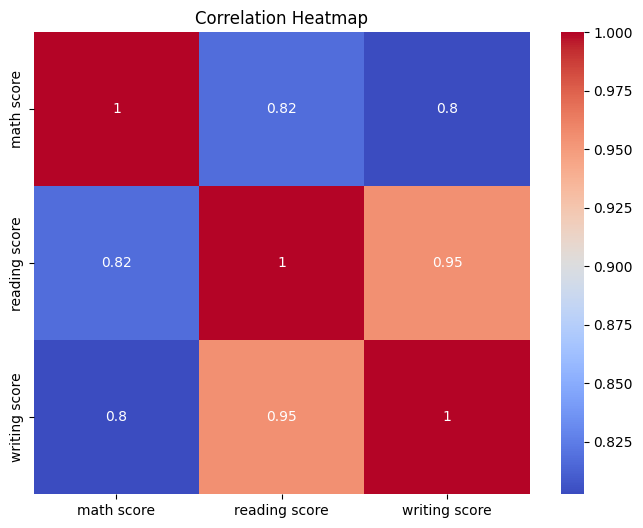


Key Insights:
- Gender gap in scores:  math score       5.095011
reading score   -7.135079
writing score   -9.155978
Name: male, dtype: float64
- Students with test preparation perform better on average.


In [1]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load dataset
df = pd.read_csv("/content/StudentsPerformance.csv")

# Step 3: Basic info
print(df.head())
print(df.info())
print(df.describe())

# Step 4: Exploratory Data Analysis
# Average scores by gender
gender_scores = df.groupby("gender")[["math score","reading score","writing score"]].mean()
print(gender_scores)

# Plot gender-wise comparison
gender_scores.plot(kind="bar", figsize=(8,5))
plt.title("Average Scores by Gender")
plt.ylabel("Average Score")
plt.show()

# Step 5: Parental Education impact
plt.figure(figsize=(10,6))
sns.boxplot(x="parental level of education", y="math score", data=df)
plt.xticks(rotation=45)
plt.title("Math Score vs Parental Education Level")
plt.show()

# Step 6: Test preparation effect
sns.barplot(x="test preparation course", y="math score", data=df, estimator="mean")
plt.title("Impact of Test Preparation on Math Score")
plt.show()

# Step 7: Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Step 8: Insights Example
print("\nKey Insights:")
print("- Gender gap in scores: ", gender_scores.diff().iloc[-1])
print("- Students with test preparation perform better on average.")


Accuracy: 0.995

Classification Report:
               precision    recall  f1-score   support

       False       0.93      1.00      0.96        13
        True       1.00      0.99      1.00       187

    accuracy                           0.99       200
   macro avg       0.96      1.00      0.98       200
weighted avg       1.00      0.99      1.00       200



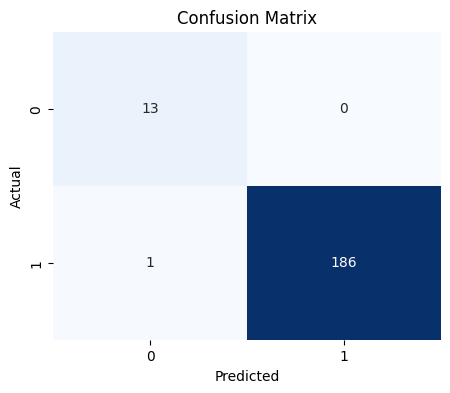

In [2]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

# Step 2: Load dataset
df = pd.read_csv("/content/StudentsPerformance.csv")

# Step 3: Create a target variable (Pass/Fail)
# Let's assume passing requires >= 40 in all subjects
df["pass_math"] = df["math score"] >= 40
df["pass_reading"] = df["reading score"] >= 40
df["pass_writing"] = df["writing score"] >= 40
df["overall_pass"] = df["pass_math"] & df["pass_reading"] & df["pass_writing"]

# Step 4: Encode categorical variables
le = LabelEncoder()
for col in ["gender","race/ethnicity","parental level of education","lunch","test preparation course"]:
    df[col] = le.fit_transform(df[col])

# Step 5: Features & Target
X = df[["gender","race/ethnicity","parental level of education","lunch","test preparation course",
         "math score","reading score","writing score"]]
y = df["overall_pass"]

# Step 6: Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train Decision Tree model
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)

# Step 8: Predictions
y_pred = model.predict(X_test)

# Step 9: Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Heatmap
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



2025-08-29 18:22:53.473 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-29 18:22:53.644 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-08-29 18:22:53.644 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-29 18:22:53.647 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-29 18:22:53.648 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-29 18:22:53.650 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-29 18:22:53.651 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-29 18:22:53.686 Thread 'MainThread': mi

DeltaGenerator()

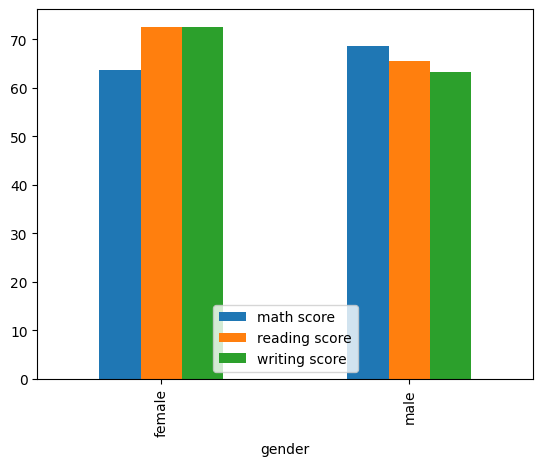

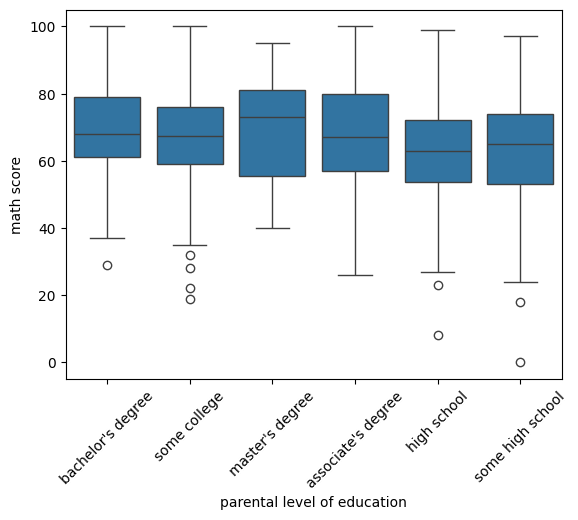

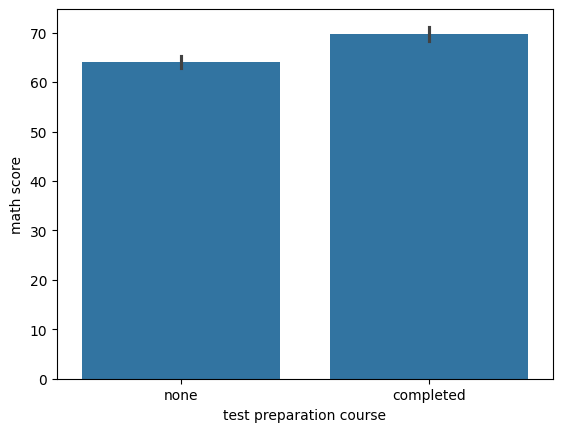

In [5]:
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("/content/StudentsPerformance.csv")

st.title("📊 Educational Equity Dashboard")

# Gender analysis
st.subheader("Average Scores by Gender")
gender_scores = df.groupby("gender")[["math score","reading score","writing score"]].mean()
st.dataframe(gender_scores)

fig, ax = plt.subplots()
gender_scores.plot(kind="bar", ax=ax)
st.pyplot(fig)

# Parental education impact
st.subheader("Math Scores vs Parental Education")
fig, ax = plt.subplots()
sns.boxplot(x="parental level of education", y="math score", data=df, ax=ax)
plt.xticks(rotation=45)
st.pyplot(fig)

# Test prep effect
st.subheader("Impact of Test Preparation on Math Score")
fig, ax = plt.subplots()
sns.barplot(x="test preparation course", y="math score", data=df, ax=ax)
st.pyplot(fig)

In [4]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 94.1 MB/s eta 0:00:00
